In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
class Bandit:
    def __init__(self, seed):
        self.seed = seed
        np.random.seed(seed)
        self.mx = np.random.rand()*10
        
    def pull(self):
        return np.random.rand()*self.mx
    
    def __repr__(self):
        return "Bandit {}, Max Payout: {:.3f}".format(self.seed, self.mx)
    
#b = Bandit(0)
bandits = [Bandit(i*2) for i in range(4)]
print(bandits)

[Bandit 0, Max Payout: 5.488, Bandit 2, Max Payout: 4.360, Bandit 4, Max Payout: 9.670, Bandit 6, Max Payout: 8.929]


## Epsilion-Greedy Strategy

In [5]:
def epsilon_greedy(bandits, total_pulls, eps):
    """
    Parameters
    ----------
    bandits: list of Bandit
        The bandits that we can pull on
    total_pulls: int
        Number of pulls to execute
    eps: float in [0, 1]
        Every eps proportion of pulls, on average, I choose a random one to pull.  
        Otherwise, I pull the one that has the greatest *average* payout
        Ex) eps = 0.1, I'll explore 10% of the time, exploit the 
        one I think is the best 90% of the time
    
    Returns
    -------
    total_reward: float
        The total reward we got after all pulls
    choices: ndarray(total_pulls, dtype=int)
        The index of the bandit chosen at each pull over time
    """
    n_bandits = len(bandits)
    total_reward = 0
    pulls   = np.zeros(n_bandits)   # Create an array of all 0's which stores how many pulls are taken at each bandit
    payouts = np.zeros(n_bandits)   # Create an array of all 0's which stores the payout of each bandit so far
    choices = np.zeros(total_pulls) # Create an array of all 0's stores the index of the bandit chosen at each pull
    for pull in range(total_pulls):
        ## Step 1: Choose which bandit to pull
        dart = np.random.rand() # Choose number in [0, 1]
        if dart <= eps:
            # If this number is in [0, eps], choose a random bandit
            idx = np.random.randint(n_bandits)
        else:
            # Otherwise, choose bandit which has maximum avg payout so far
            denom = np.array(pulls)
            denom[denom == 0] = 1 # Avoid divide by 0
            avgs = payouts / denom
            idx = np.argmax(avgs) #
        
        ## Step 2: Pull the bandit that we intend to pull, increment the number of pulls
        ## for that bandit, and accumulate the reward for that bandit and for our total
        reward = bandits[idx].pull()
        total_reward += reward
        pulls[idx] += 1
        payouts[idx] += reward
        choices[pull] = idx
    
    return total_reward, choices


4291.052582516586
Bandit 4, Max Payout: 9.670


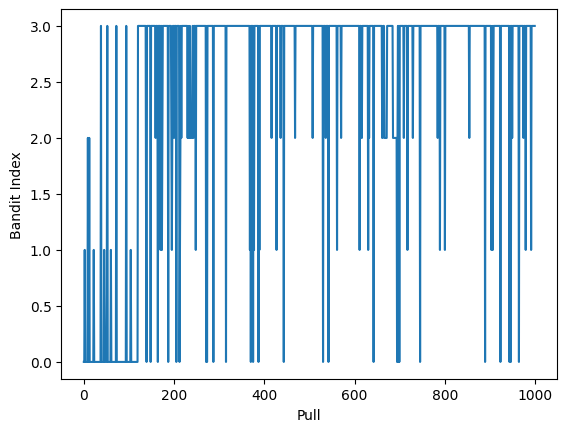

In [6]:
results = {}
total_reward, choices = epsilon_greedy(bandits, total_pulls=1000, eps=0.1)
print(total_reward)
plt.plot(choices)
plt.xlabel('Pull')
plt.ylabel('Bandit Index')
print(bandits[2])

In [8]:
total_pulls = np.arange(10, 1001, 10) # Try these different numbers of pulls 
n_experiments = 200 # How many experiments to run for each epsilon for each number of pulls.
# We'll take the average over all of these experiments

for eps in [0.01, 0.1, 0.4]:
    # Start out with an array of zeros to keep track of the average payout at each number
    avg_payout = np.zeros_like(total_pulls) 
    for i, pulls in enumerate(total_pulls):
        ipd.clear_output()
        #print(eps, total_pulls[i])
        # For each number of pulls, run some number of experiments
        reward = 0
        for j in range(n_experiments):
            reward_j, _ = epsilon_greedy(bandits, total_pulls=pulls, eps=eps)
            reward += reward_j
        avg_payout[i] = reward/n_experiments

    results["$\\epsilon = {}$".format(eps)] = avg_payout

Text(0.5, 1.0, '$\\epsilon$-Greedy Policy Results')

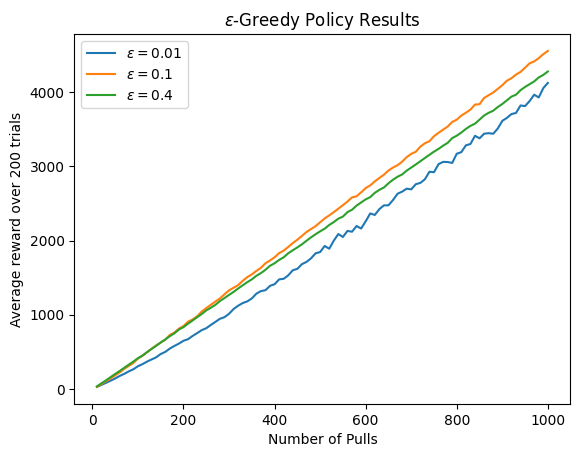

In [9]:
def plot_avg_trials(results):
    for key in results.keys():
        plt.plot(total_pulls, results[key])
        plt.legend(list(results.keys()))
        plt.xlabel("Number of Pulls")
        plt.ylabel("Average reward over {} trials".format(n_experiments))
        
plot_avg_trials(results)
plt.title("$\epsilon$-Greedy Policy Results")

In [10]:
epsilons = np.linspace(0, 1, 101)
avg_rewards = np.zeros_like(epsilons)
for i, eps in enumerate(epsilons):
    reward = 0
    for j in range(n_experiments):
        reward_j, _ = epsilon_greedy(bandits, total_pulls=1000, eps=eps)
        reward += reward_j
    avg_rewards[i] = reward/n_experiments

0.07


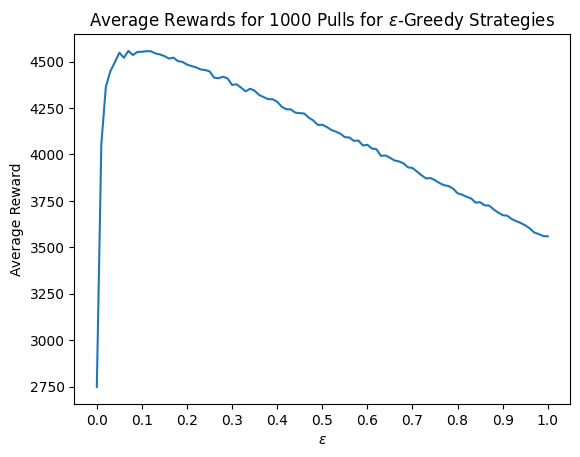

In [11]:
plt.plot(epsilons, avg_rewards)
plt.xlabel("$\epsilon$")
plt.ylabel("Average Reward")
plt.title("Average Rewards for 1000 Pulls for $\epsilon$-Greedy Strategies")
plt.xticks(np.linspace(0, 1, 11))
print(epsilons[np.argmax(avg_rewards)])